In [5]:
import mysql.connector
import os

from pyspark.sql import SparkSession

In [2]:
# 환경변수 설정
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars /usr/local/lib/mysql-connector-java-5.1.49-bin.jar pyspark-shell'

In [6]:
ss = SparkSession\
            .builder\
            .appName('MySQL')\
            .getOrCreate()

24/12/17 13:32:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
host_ip = '15.168.86.105'
user_id = 'spark_user'
user_password = '1234'

In [8]:
mysql_url = f'jdbc:mysql://{host_ip}:3306/my_db'

Tue Dec 17 13:33:06 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.


In [12]:
dept_df = ss.read.format('jdbc')\
            .options(
                url = mysql_url
                , driver = 'com.mysql.jdbc.Driver'
                , dbtable = 'DEPT' #여기에 쿼리 써도 됨
                , user = user_id
                , password = user_password
                    )\
        .load()

dept_df.show()

+------+----------+--------+
|DEPTNO|     DNAME|     LOC|
+------+----------+--------+
|    10|ACCOUNTING|NEW YORK|
|    20|  RESEARCH|  DALLAS|
|    30|     SALES| CHICAGO|
|    40|OPERATIONS|  BOSTON|
+------+----------+--------+



Tue Dec 17 13:35:22 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Tue Dec 17 13:35:23 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

In [13]:
emp_df = ss.read.format('jdbc')\
            .options(
                url = mysql_url
                , driver = 'com.mysql.jdbc.Driver'
                , dbtable = 'EMP' #여기에 쿼리 써도 됨
                , user = user_id
                , password = user_password
                    )\
        .load()

emp_df.show()

Tue Dec 17 13:35:39 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Tue Dec 17 13:35:40 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

+-----+------+---------+----+----------+-------+-------+------+
|EMPNO| ENAME|      JOB| MGR|  HIREDATE|    SAL|   COMM|DEPTNO|
+-----+------+---------+----+----------+-------+-------+------+
| 7369| SMITH|    CLERK|7902|1980-12-17| 800.00|   null|    20|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600.00| 300.00|    30|
| 7521|  WARD| SALESMAN|7698|1981-02-22|1250.00| 500.00|    30|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975.00|   null|    20|
| 7654|MARTIN| SALESMAN|7698|1981-09-28|1250.00|1400.00|    30|
| 7698| BLAKE|  MANAGER|7839|1981-05-01|2850.00|   null|    30|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450.00|   null|    10|
| 7788| SCOTT|  ANALYST|7566|1982-12-09|3000.00|   null|    20|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000.00|   null|    10|
| 7844|TURNER| SALESMAN|7698|1981-09-08|1500.00|   null|    30|
| 7876| ADAMS|    CLERK|7788|1983-01-12|1100.00|   null|    20|
| 7900| JAMES|    CLERK|7698|1981-12-03| 950.00|   null|    30|
| 7902|  FORD|  ANALYST|7566|1981-12-03|

In [15]:
salgrade_df = ss.read.format('jdbc')\
            .options(
                url = mysql_url
                , driver = 'com.mysql.jdbc.Driver'
                , dbtable = 'salgrade' #여기에 쿼리 써도 됨
                , user = user_id
                , password = user_password
                    )\
        .load()

salgrade_df.show()

+-----+-----+-----+
|grade|losal|hisal|
+-----+-----+-----+
|    1|  700| 1200|
|    2| 1201| 1400|
|    3| 1401| 2000|
|    4| 2001| 3000|
|    5| 3001| 9999|
+-----+-----+-----+



Tue Dec 17 13:36:24 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Tue Dec 17 13:36:24 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

In [23]:
#쿼리로 가져오기
tmp_df = ss.read.format('jdbc')\
            .options(
                url =mysql_url
                , driver = 'com.mysql.jdbc.Driver'
                , query = 'SELECT DEPTNO FROM DEPT'
                , user = user_id
                , password = user_password
            )\
            .load()

tmp_df.show()

+------+
|DEPTNO|
+------+
|    10|
|    20|
|    30|
|    40|
+------+



Tue Dec 17 13:41:29 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Tue Dec 17 13:41:29 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

In [24]:
dept_df.createOrReplaceTempView('dept_df')
emp_df.createOrReplaceTempView('emp_df')
salgrade_df.createOrReplaceTempView('salgrade_df')

In [68]:
# 모든 테이블 한번에 가져오기
table_query = "(SELECT table_name FROM information_schema.tables WHERE table_schema = 'my_db') AS table_list"
# 서브 쿼리로 담아서 별칭 주고 보내주기
table_query

table_data = {}

for i in tables_df.collect():
    table_df = ss.read\
                .format("jdbc")\
                .options(
                    url = mysql_url,
                    driver = "com.mysql.jdbc.Driver",
                    dbtable = i.table_name,
                    user = user_id,
                    password = user_password
                ).load()
    
    table_data[i] = table_df
    
    table_df.show()

print(table_data[list(table_data.keys())[0]])
print(table_data[list(table_data.keys())[1]])
print(table_data[list(table_data.keys())[2]])


Tue Dec 17 14:07:42 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Tue Dec 17 14:07:42 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

+------+----------+--------+
|DEPTNO|     DNAME|     LOC|
+------+----------+--------+
|    10|ACCOUNTING|NEW YORK|
|    20|  RESEARCH|  DALLAS|
|    30|     SALES| CHICAGO|
|    40|OPERATIONS|  BOSTON|
+------+----------+--------+

+-----+------+---------+----+----------+-------+-------+------+
|EMPNO| ENAME|      JOB| MGR|  HIREDATE|    SAL|   COMM|DEPTNO|
+-----+------+---------+----+----------+-------+-------+------+
| 7369| SMITH|    CLERK|7902|1980-12-17| 800.00|   null|    20|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600.00| 300.00|    30|
| 7521|  WARD| SALESMAN|7698|1981-02-22|1250.00| 500.00|    30|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975.00|   null|    20|
| 7654|MARTIN| SALESMAN|7698|1981-09-28|1250.00|1400.00|    30|
| 7698| BLAKE|  MANAGER|7839|1981-05-01|2850.00|   null|    30|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450.00|   null|    10|
| 7788| SCOTT|  ANALYST|7566|1982-12-09|3000.00|   null|    20|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000.00|   null|    10|

Tue Dec 17 14:07:42 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Tue Dec 17 14:07:42 KST 2024 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

In [69]:
ss.stop()

### 하둡으로 파일 불러오고 읽기

In [71]:
from pyspark.sql import SparkSession

spark = SparkSession\
            .builder\
            .appName('HDFS TEST')\
            .config('spark.hadoop.fs.defaultFS', 'hdfs://localhost:9000')\
            .getOrCreate()

# HDFS 파일 읽기
df = spark.read.text('hdfs://localhost:9000/test/testfile.txt')
df.show()


+----------+
|     value|
+----------+
|Hello HDFS|
+----------+



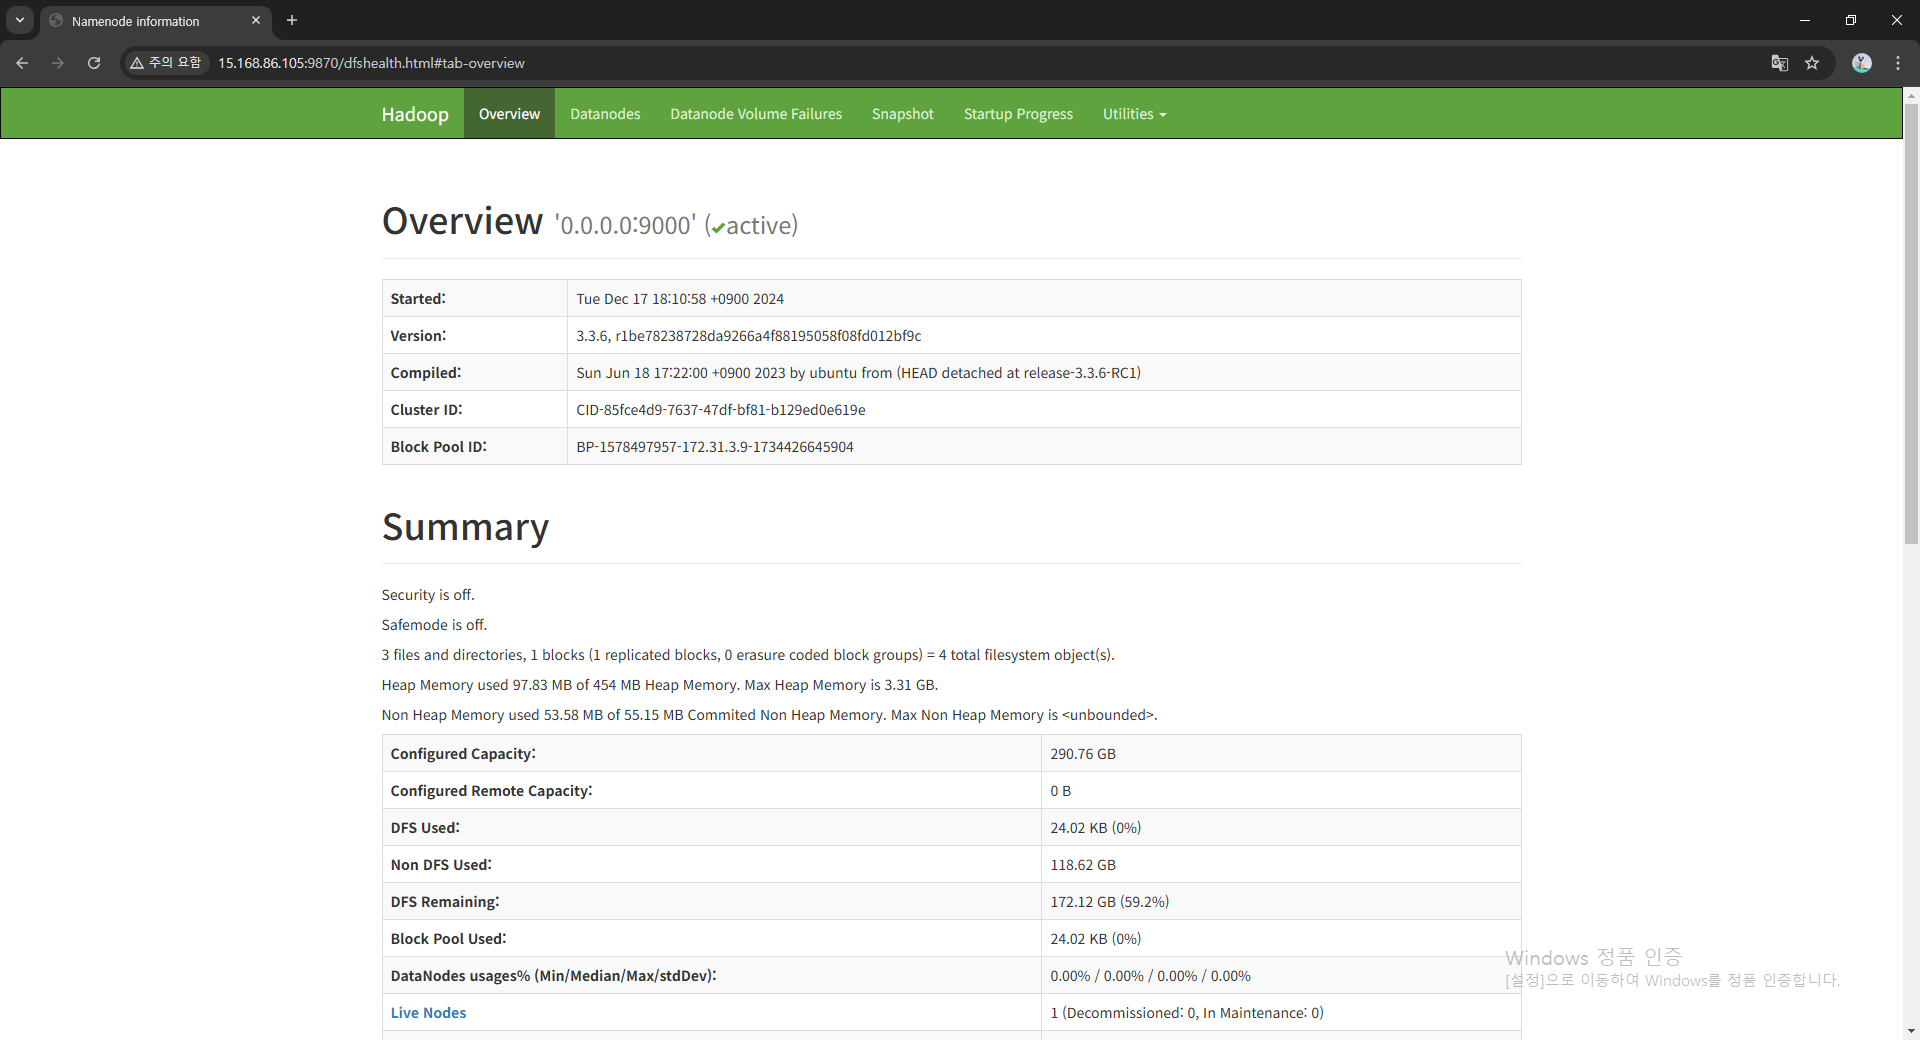


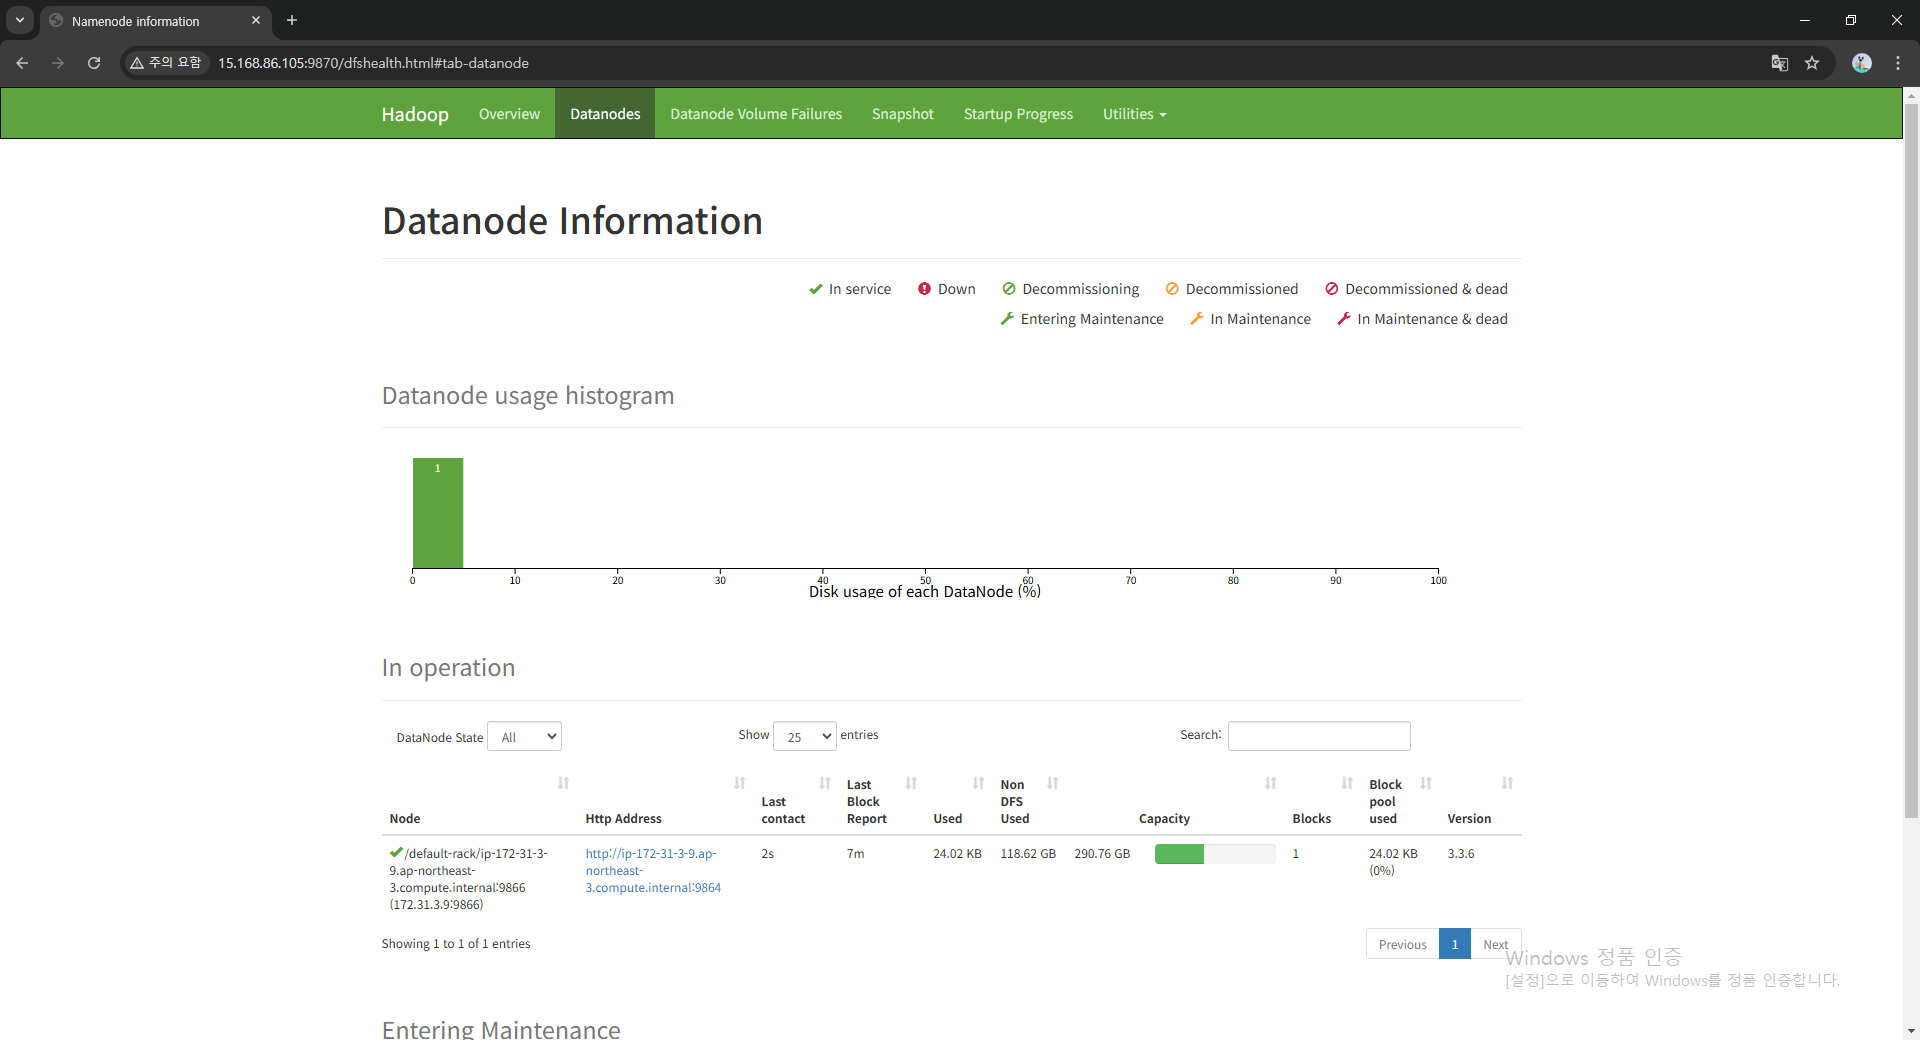

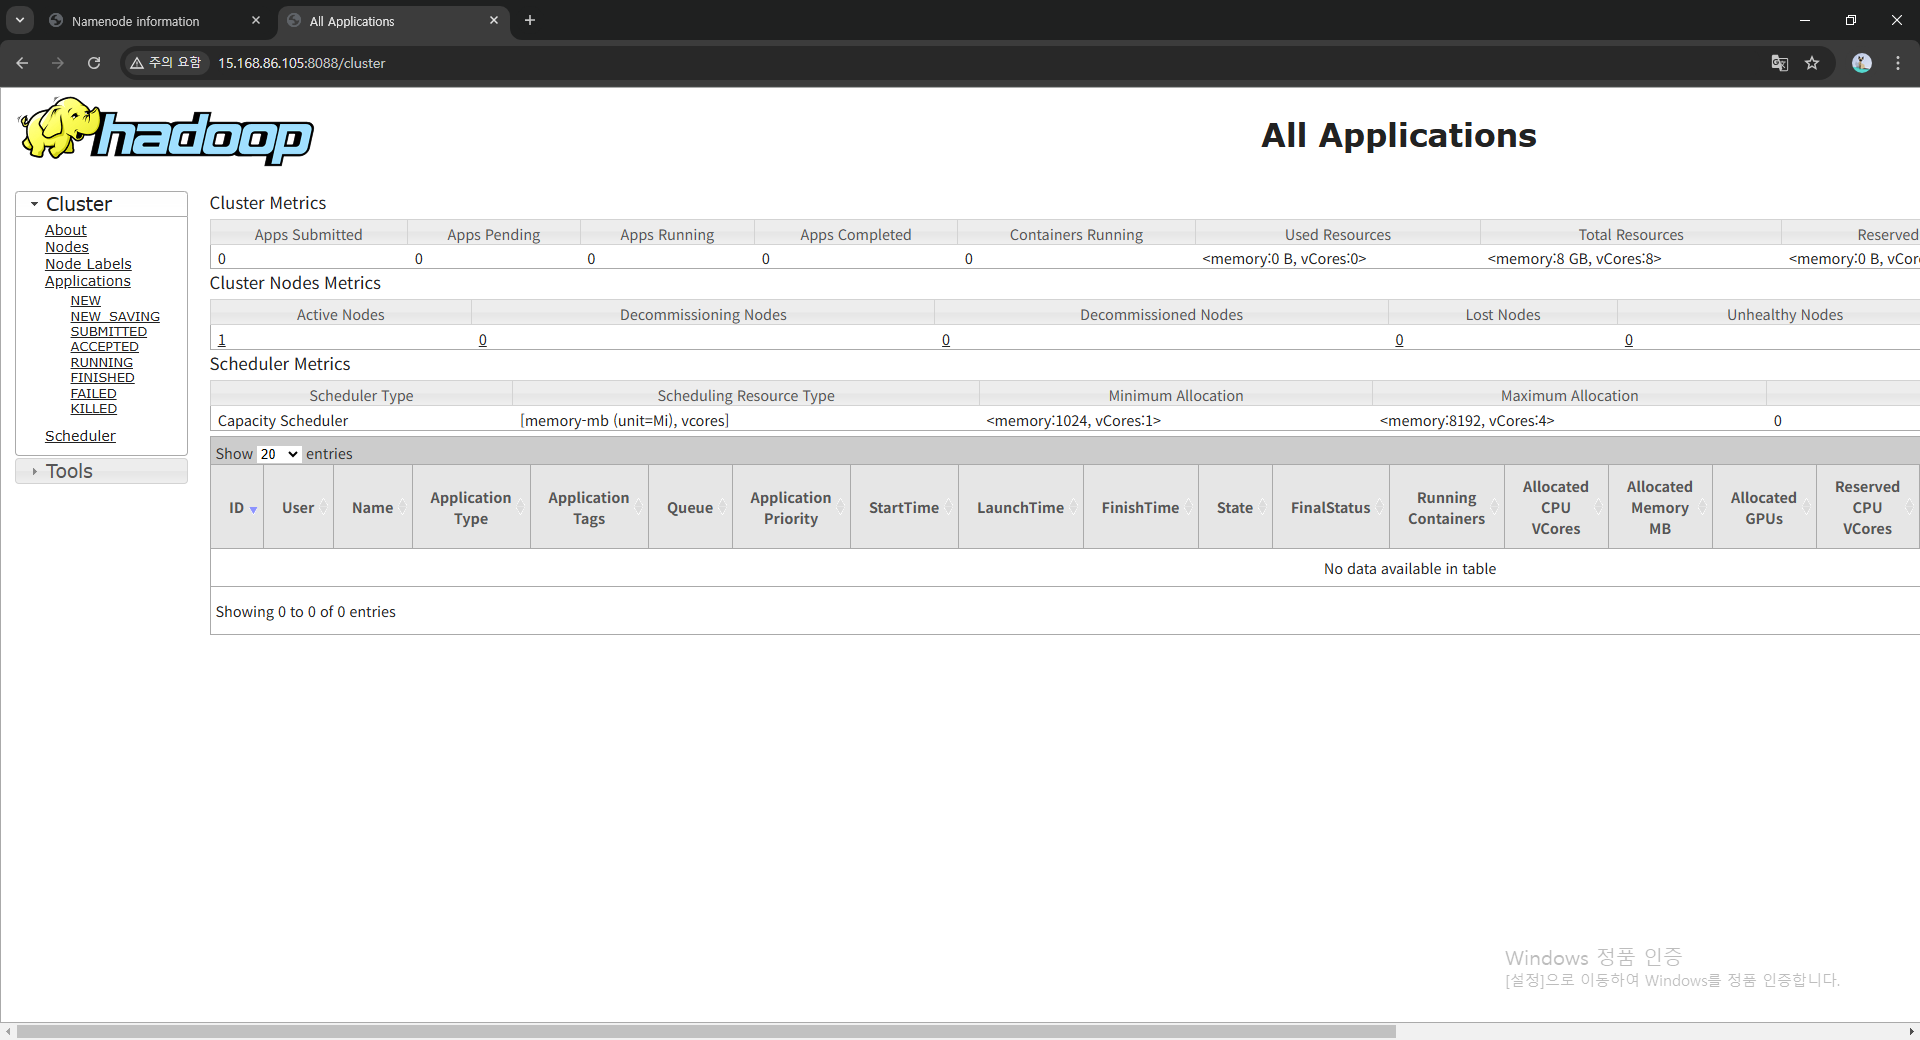